In [1]:
import json

In [2]:
with open("w_dict.json", "r") as f:
    w_dict = json.load(f)
with open("ap_dict.json", "r") as f:
    ap_dict = json.load(f)
with open("technique_dict.json", "r") as f:
    technique_dict = json.load(f)

In [3]:
print("Weaknesses ", len(w_dict))
print("Attack Patterns ", len(ap_dict))
print("Techniques ", len(technique_dict))

Weaknesses  924
Attack Patterns  546
Techniques  566


In [4]:
f = open("cwe_mitigation_ids_temp.json")
w_mitigation = json.load(f)

f = open("capec_mitigation_temp.json")
ap_mitigation = json.load(f)

f = open("technique_mitigation_temp.json")
technique_mitigation = json.load(f)

f = open("technique_detection_temp.json")
technique_detection = json.load(f)

f = open("capec_detection_temp.json")
ap_detection = json.load(f)

f = open("cwe_detection_temp.json")
w_detection = json.load(f)

f = open("d3fend_technique.json")
d3fend_technique = json.load(f)

f = open("engage_technique.json")
engage_technique = json.load(f)

f = open("d3fend.json")
d3 = json.load(f)

f = open("engage_activity.json")
engage_activity = json.load(f)

f = open("tactic_temp.json")
tactic = json.load(f)

In [5]:
print("CWE mitigations ", len(w_mitigation))
print("CWE detections ", len(w_detection))
print("AP mitigations ", len(ap_mitigation))
print("AP detections ", len(ap_detection))
print("Technique mitigations ", len(technique_mitigation))
print("Technique detections ", len(technique_detection))
print("Tactics ", len(tactic))
print("d3fend ", len(d3))
print("engage activity ", len(engage_activity))

CWE mitigations  1597
CWE detections  481
AP mitigations  1044
AP detections  91
Technique mitigations  43
Technique detections  566
Tactics  14
d3fend  120
engage activity  31


In [6]:
ap_count = 0
m_count = 0
d_count = 0
ap_m_count = 0
ap_d_count = 0
m_d_count = 0
ap_m_d_count = 0
none_count = 0
for w in w_dict:
    links = w_dict[w]
    if links["ap"] and links["mitigations"] and links["detections"]:
        ap_m_d_count += 1
    elif links["ap"] and links["mitigations"]:
        ap_m_count += 1
    elif links["ap"] and links["detections"]:
        ap_d_count += 1
    elif links["mitigations"] and links["detections"]:
        m_d_count += 1
    elif links["ap"]:
        ap_count += 1
    elif links["mitigations"]:
        m_count += 1
    elif links["detections"]:
        d_count += 1
    else:
        none_count += 1

print("none count ", none_count)
print("ap count ", ap_count)
print("m count ", m_count)
print("d count ", d_count)
print("ap m count ", ap_m_count)
print("ap d count ", ap_d_count)
print("m d count ", m_d_count)
print("ap m d count ", ap_m_d_count)

none count  217
ap count  47
m count  345
d count  9
ap m count  201
ap d count  3
m d count  29
ap m d count  73


In [7]:
w_count = 0
m_count = 0
d_count = 0
tech_count = 0
w_m_count = 0
w_d_count = 0
w_tech_count = 0
m_d_count = 0
m_tech_count = 0
d_tech_count = 0
w_m_d_count = 0
w_m_tech_count = 0
m_d_tech_count = 0
w_d_tech_count = 0
w_m_d_tech_count = 0
none_count = 0

for ap in ap_dict:
    links = ap_dict[ap]
    if (
        links["cwes"]
        and links["mitigations"]
        and links["detections"]
        and links["techniques"]
    ):
        w_m_d_tech_count += 1
    elif links["cwes"] and links["mitigations"] and links["detections"]:
        w_m_d_count += 1
    elif links["cwes"] and links["mitigations"] and links["techniques"]:
        w_m_tech_count += 1
    elif links["cwes"] and links["detections"] and links["techniques"]:
        w_d_tech_count += 1
    elif links["mitigations"] and links["detections"] and links["techniques"]:
        m_d_tech_count += 1
    elif links["cwes"] and links["mitigations"]:
        w_m_count += 1
    elif links["cwes"] and links["detections"]:
        w_d_count += 1
    elif links["cwes"] and links["techniques"]:
        w_tech_count += 1
    elif links["detections"] and links["techniques"]:
        d_tech_count += 1
    elif links["mitigations"] and links["techniques"]:
        m_tech_count += 1
    elif links["mitigations"] and links["detections"]:
        m_d_count += 1
    elif links["cwes"]:
        w_count += 1
    elif links["mitigations"]:
        m_count += 1
    elif links["detections"]:
        d_count += 1
    elif links["techniques"]:
        tech_count += 1
    else:
        none_count += 1

print("w count ", w_count)
print("m count ", m_count)
print("d count ", d_count)
print("tech count ", tech_count)
print("w m count ", w_m_count)
print("w d count ", w_d_count)
print("w tech count ", w_tech_count)
print("m d count ", m_d_count)
print("m tech count ", m_tech_count)
print("d tech count ", d_tech_count)
print("w m d count ", w_m_d_count)
print("w m tech count ", w_m_tech_count)
print("m d tech count ", m_d_tech_count)
print("w d tech count ", w_d_tech_count)
print("w m d tech count ", w_m_d_tech_count)
print("none count ", none_count)

w count  93
m count  53
d count  0
tech count  7
w m count  200
w d count  0
w tech count  11
m d count  3
m tech count  10
d tech count  0
w m d count  39
w m tech count  52
m d tech count  1
w d tech count  0
w m d tech count  10
none count  67


In [8]:
for technique in technique_dict:
    technique_dict[technique]["ap"] = []
    technique_dict[technique]["d3fend"] = []
    technique_dict[technique]["engage"] = []

for ap in ap_dict:
    for technique in ap_dict[ap]["techniques"]:
        technique_dict[technique]["ap"].append(ap)

for d3fend_tech in d3fend_technique:
    technique = d3fend_tech["_from"]
    d3fend = d3fend_tech["_to"]
    technique_dict[technique]["d3fend"].append(d3fend)

for engage_tech in engage_technique:
    technique = engage_tech["_from"]
    engage = engage_tech["_to"]
    technique_dict[technique]["engage"].append(engage)

In [9]:
counts_dict = {}

for technique in technique_dict:
    links = technique_dict[technique]
    str = []
    if links["ap"]:
        str.append("ap")
    if links["mitigations"]:
        str.append("mitigations")
    if links["detections"]:
        str.append("detections")
    if links["tactics"]:
        str.append("tactics")
    if links["d3fend"]:
        str.append("d3fend")
    if links["engage"]:
        str.append("engage")

    str = "_".join(str)

    if str in counts_dict:
        counts_dict[str] += 1
    else:
        counts_dict[str] = 1

counts_dict

{'mitigations_detections_tactics_engage': 104,
 'mitigations_detections_tactics': 243,
 'mitigations_detections_tactics_d3fend_engage': 10,
 'mitigations_detections_tactics_d3fend': 46,
 'detections_tactics_engage': 17,
 'ap_detections_tactics_engage': 20,
 'detections_tactics': 40,
 'ap_mitigations_detections_tactics': 36,
 'ap_mitigations_detections_tactics_engage': 18,
 'ap_detections_tactics': 6,
 'detections_tactics_d3fend': 4,
 'ap_mitigations_detections_tactics_d3fend': 15,
 'ap_detections_tactics_d3fend': 1,
 'ap_mitigations_detections_tactics_d3fend_engage': 5,
 'detections_tactics_d3fend_engage': 1}

In [10]:
f = open("cwe_temp.json")
cwe = json.load(f)

In [11]:
top_25_cwes = [
    "79",
    "787",
    "20",
    "125",
    "119",
    "89",
    "200",
    "416",
    "352",
    "78",
    "190",
    "22",
    "476",
    "287",
    "434",
    "732",
    "94",
    "522",
    "611",
    "798",
    "502",
    "269",
    "400",
    "306",
    "862",
]

bron_to_original_ids = {}

for w in cwe:
    if w["original_id"] in top_25_cwes:
        bron_to_original_ids[w["_id"]] = w["original_id"]

In [12]:
original_to_counts = {}
for cwe_id in bron_to_original_ids:
    num_mitigations = len(w_dict[cwe_id]["mitigations"])
    num_detections = len(w_dict[cwe_id]["detections"])
    num_aps = len(w_dict[cwe_id]["ap"])
    ap_mitigations = set()
    ap_detections = set()
    techniques = set()
    tech_mitigations = set()
    tech_detections = set()
    tactics = set()
    d3fends = set()
    engages = set()

    for ap in w_dict[cwe_id]["ap"]:
        for mitigation in ap_dict[ap]["mitigations"]:
            ap_mitigations.add(mitigation)
        for detection in ap_dict[ap]["detections"]:
            ap_detections.add(detection)
        for technique in ap_dict[ap]["techniques"]:
            techniques.add(technique)
            for tactic in technique_dict[technique]["tactics"]:
                tactics.add(tactic)
            for mitigation in technique_dict[technique]["mitigations"]:
                tech_mitigations.add(mitigation)
            for detection in technique_dict[technique]["detections"]:
                tech_detections.add(detection)
            for d3fend in technique_dict[technique]["d3fend"]:
                d3fends.add(d3fend)
            for engage in technique_dict[technique]["engage"]:
                engages.add(engage)

    original_to_counts[bron_to_original_ids[cwe_id]] = {
        "name": w_dict[cwe_id]["name"],
        "cwe mitigations": num_mitigations,
        "cwe detections": num_detections,
        "aps": num_aps,
        "techniques": len(techniques),
        "tactics": len(tactics),
        "ap mitigations": len(ap_mitigations),
        "ap detections": len(ap_detections),
        "technique mitigations": len(tech_mitigations),
        "technique detections": len(tech_detections),
        "d3fend": len(d3fends),
        "engage": len(engages),
    }

In [13]:
mitigation_to_name = {}
for mitigation in w_mitigation:
    mitigation_to_name[mitigation["_id"]] = mitigation["metadata"]["Description"]
for mitigation in ap_mitigation:
    mitigation_to_name[mitigation["_id"]] = mitigation["metadata"]
for mitigation in technique_mitigation:
    mitigation_to_name[mitigation["_id"]] = mitigation["name"]
for detection in w_detection:
    mitigation_to_name[detection["_id"]] = detection["metadata"]["Description"]
for detection in ap_detection:
    mitigation_to_name[detection["_id"]] = detection["metadata"]
for detection in technique_detection:
    mitigation_to_name[detection["_id"]] = detection["name"]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(mitigation_to_name.values())

CountVectorizer()

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# heatmap where each entry is a cwe/capec/technique mitigation/detection
heatmaps = {}  # dictionary where key is the cwe, value is the heatmap
mean_similarities = {}
for cwe_id in bron_to_original_ids:
    entries = []

    for mitigation in w_dict[cwe_id]["mitigations"]:
        entries.append(mitigation_to_name[mitigation])

    for detection in w_dict[cwe_id]["detections"]:
        entries.append(mitigation_to_name[detection])

    for ap in w_dict[cwe_id]["ap"]:
        for mitigation in ap_dict[ap]["mitigations"]:
            entries.append(mitigation_to_name[mitigation])
        for detection in ap_dict[ap]["detections"]:
            entries.append(mitigation_to_name[detection])
        for technique in ap_dict[ap]["techniques"]:
            for mitigation in technique_dict[technique]["mitigations"]:
                entries.append(mitigation_to_name[mitigation])
            for detection in technique_dict[technique]["detections"]:
                entries.append(mitigation_to_name[detection])

    entries_vectors = vectorizer.transform(entries)
    similarities = cosine_similarity(entries_vectors)
    heatmaps[bron_to_original_ids[cwe_id]] = similarities
    mean_similarities[bron_to_original_ids[cwe_id]] = np.mean(similarities)

In [16]:
mean_similarities

{'119': 0.15000819698111878,
 '125': 0.5572464283431939,
 '190': 0.23152754479156368,
 '20': 0.12965021209056113,
 '200': 0.075194728152497,
 '22': 0.17668629097708896,
 '269': 0.265129651875953,
 '287': 0.08054546441561836,
 '306': 0.3038850463558885,
 '352': 0.27530166894605135,
 '400': 0.2926472924003023,
 '416': 0.4999999999999999,
 '434': 0.2979105938632938,
 '476': 0.3064559261952648,
 '502': 0.2272226738107639,
 '522': 0.07652275369318233,
 '611': 0.6646069803786536,
 '732': 0.15927602226627402,
 '78': 0.23016457066627605,
 '787': 0.3431407306778413,
 '79': 0.1982833552813999,
 '798': 0.23463929577165868,
 '862': 0.19896501216288945,
 '89': 0.26012107283382385,
 '94': 0.19252763909155768}

In [17]:
heatmaps.keys()

dict_keys(['119', '125', '190', '20', '200', '22', '269', '287', '306', '352', '400', '416', '434', '476', '502', '522', '611', '732', '78', '787', '79', '798', '862', '89', '94'])

<AxesSubplot:>

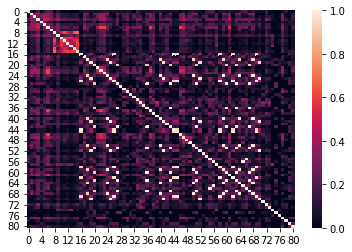

In [18]:
import seaborn as sns

sns.heatmap(heatmaps["119"])

In [19]:
import pandas as pd

spaCy_probs = pd.read_csv("link_probs_spaCy_cwe_capec.csv")
BoW_probs = pd.read_csv("link_probs_BoW_spaCy_cwe_capec.csv")
BERT_probs = pd.read_csv("link_probs_BERT_cwe_capec.csv")

BoW_probs.drop(columns="spaCy link probability", inplace=True)

df = BoW_probs.merge(spaCy_probs, on=["CAPEC", "CWE", "CAPEC name", "CWE name"])
df = df.merge(BERT_probs, on=["CAPEC", "CWE", "CAPEC name", "CWE name"])

In [20]:
df["threshold"] = df[
    ["BoW link probability", "spaCy link probability", "BERT link probability"]
].min(axis=1)

In [21]:
cwes = list(bron_to_original_ids.keys())
for i in range(len(cwes)):
    cwes[i] = cwes[i].split("/")[1]

top_25_df = df[df["CWE"].isin(cwes)]
top_25_df_over_90 = top_25_df[top_25_df["threshold"] >= 0.9]
len(top_25_df_over_90)

184

<AxesSubplot:>

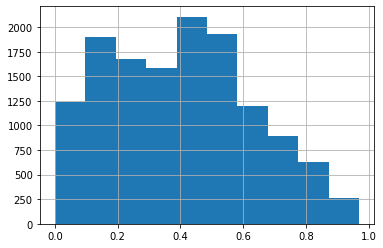

In [22]:
top_25_df["threshold"].hist()

In [23]:
import pandas as pd

cwe_table = pd.DataFrame(original_to_counts).T
cwe_table = cwe_table[
    [
        "name",
        "cwe mitigations",
        "cwe detections",
        "aps",
        "ap mitigations",
        "ap detections",
        "techniques",
        "technique mitigations",
        "technique detections",
        "tactics",
        "d3fend",
        "engage",
    ]
]

In [24]:
cwe_table["cwe id"] = cwe_table.index
cwe_table = cwe_table[
    [
        "cwe id",
        "name",
        "cwe mitigations",
        "cwe detections",
        "aps",
        "ap mitigations",
        "ap detections",
        "techniques",
        "technique mitigations",
        "technique detections",
        "tactics",
        "d3fend",
        "engage",
    ]
]
cwe_table
cwe_table.style.hide_index()

cwe id,name,cwe mitigations,cwe detections,aps,ap mitigations,ap detections,techniques,technique mitigations,technique detections,tactics,d3fend,engage
119,Improper Restriction of Operations within the Bounds of a Memory Buffer,7,9,12,59,6,0,0,0,0,0,0
125,Out-of-bounds Read,2,0,1,0,0,0,0,0,0,0,0
190,Integer Overflow or Wraparound,7,8,1,4,0,0,0,0,0,0,0
20,Improper Input Validation,10,10,51,191,25,4,7,4,3,0,4
200,Exposure of Sensitive Information to an Unauthorized Actor,1,6,59,60,3,18,9,18,5,4,12
22,Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal'),11,9,5,38,6,0,0,0,0,0,0
269,Improper Privilege Management,3,0,3,4,0,0,0,0,0,0,0
287,Improper Authentication,1,9,10,16,0,4,11,4,6,14,6
306,Missing Authentication for Critical Function,4,8,4,7,0,0,0,0,0,0,0
352,Cross-Site Request Forgery (CSRF),7,9,4,12,0,0,0,0,0,0,0


In [25]:
cwe_table.to_csv("top_25_cwes.csv")